In [2]:
##Lets import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
## Lets read the file
gstore=pd.read_csv("googleplaystore.csv")

In [4]:
gstore.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


# Preliminary Data Analysis

In [5]:
gstore.describe(include='all')

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
count,10841,10841,9367.000000,10841,10841,10841,10840,10841,10840,10841,10841,10833,10838
unique,9660,34,NaN,6002,462,22,3,93,6,120,1378,2832,33
top,ROBLOX,FAMILY,NaN,0,Varies with device,"1,000,000+",Free,0,Everyone,Tools,"August 3, 2018",Varies with device,4.1 and up
freq,9,1972,NaN,596,1695,1579,10039,10040,8714,842,326,1459,2451
mean,NaN,NaN,4.193338,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,0.537431,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,4.300000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,4.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
gstore["Installs"].value_counts()

1,000,000+        1579
10,000,000+       1252
100,000+          1169
10,000+           1054
1,000+             907
5,000,000+         752
100+               719
500,000+           539
50,000+            479
5,000+             477
100,000,000+       409
10+                386
500+               330
50,000,000+        289
50+                205
5+                  82
500,000,000+        72
1+                  67
1,000,000,000+      58
0+                  14
0                    1
Free                 1
Name: Installs, dtype: int64

In [10]:
gstore["Price"].value_counts()

0         10040
$0.99       148
$2.99       129
$1.99        73
$4.99        72
          ...  
$37.99        1
$15.46        1
$2.50         1
$1.75         1
$4.59         1
Name: Price, Length: 93, dtype: int64

# How many apps in each category?

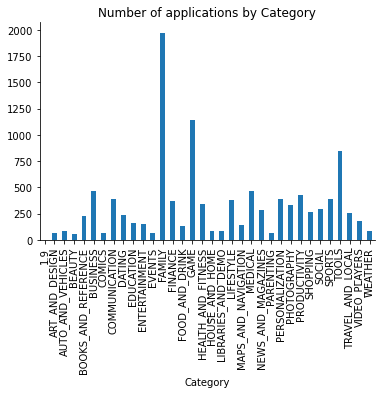

In [95]:
Catcount=gstore.groupby("Category").size()
Catcount.plot(kind="bar")
plt.title("Number of applications by Category")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines['right'].set_visible(False)
#sns.barplot(x=gstore,y=gstore["Category"])

# How many installs per category?

In [230]:
##Lets remove the comma & the plus sign
%matplotlib inline
gstore2=gstore.copy()
gstore2["Installs"]=gstore2["Installs"].str[:-1]
gstore2["Installs"]=gstore["Installs"].str.replace(",","")
gstore2["Installs"]=pd.to_numeric(gstore2["Installs"],errors='coerce')
ginstalls=gstore2.groupby("Category").sum()["Installs"].sort_values().head(10)
ginstalls

Category
1.9                          0.0
EVENTS                 1597316.0
BEAUTY                 2719705.0
PARENTING              3152111.0
AUTO_AND_VEHICLES      5313020.0
MEDICAL                5325739.0
COMICS                 5608615.0
LIBRARIES_AND_DEMO     6299591.0
ART_AND_DESIGN        12433810.0
HOUSE_AND_HOME        16871246.0
Name: Installs, dtype: float64

Text(0.5, 1.0, 'Installs by category')

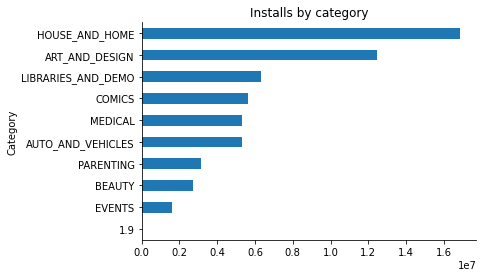

In [231]:
ginstalls.plot(kind="barh")
plt.gca().spines["right"].set_visible(False)
plt.gca().spines["top"].set_visible(False)
plt.title("Installs by category")

# Analysing the family category

Text(0, 0.5, 'Number of Apps')

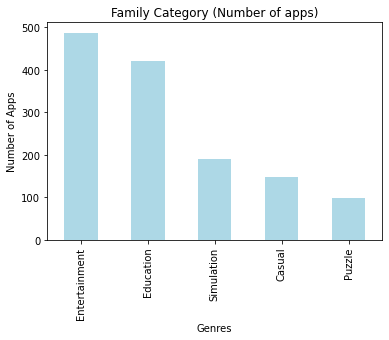

In [146]:
family_category=gstore2[gstore2["Category"]=="FAMILY"]
fam=family_category.groupby("Genres").size().sort_values(ascending=False).head(5)
fam.plot(kind="bar",color="lightblue")
plt.title("Family Category (Number of apps)")
plt.ylabel("Number of Apps")


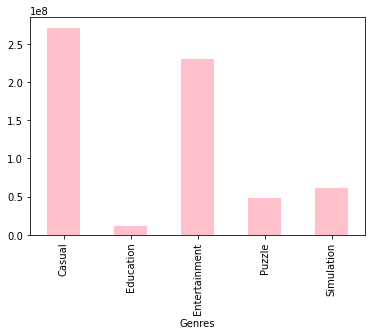

In [154]:
genres=["Education","Simulation","Entertainment","Puzzle","Casual"]
fam2=family_category[family_category["Genres"].isin(genres)]
groupfam2=fam2.groupby("Genres").sum()["Installs"]
groupfam2.plot(kind="bar",color="pink")


In [181]:
casual_fam=family_category[family_category["Genres"]=="Casual"]
casual_fam=casual_fam.sort_values("Installs",ascending=False).head(5)
casual_fam

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
3879,Pou,FAMILY,4.3,10483141,24M,50000000.0,Free,0,Everyone,Casual,"May 25, 2018",1.4.77,4.0 and up
3994,Candy Crush Saga,FAMILY,4.4,22419455,74M,50000000.0,Free,0,Everyone,Casual,"July 5, 2018",1.129.0.2,4.1 and up
3888,My Talking Tom,FAMILY,4.5,14885236,Varies with device,50000000.0,Free,0,Everyone,Casual,"July 19, 2018",4.8.0.132,4.1 and up
3910,My Talking Angela,FAMILY,4.5,9876369,99M,10000000.0,Free,0,Everyone,Casual,"July 3, 2018",3.7.2.51,4.1 and up
4247,Talking Tom Cat,FAMILY,4.3,1838090,Varies with device,10000000.0,Free,0,Everyone 10+,Casual,"July 27, 2018",Varies with device,4.1 and up


# Ratings & Categories

In [184]:

Catratings=gstore.groupby("Category").mean().drop("1.9").head(10)
Catratings

,Rating
Category,
ART_AND_DESIGN,4.358065
AUTO_AND_VEHICLES,4.190411
BEAUTY,4.278571
BOOKS_AND_REFERENCE,4.346067
BUSINESS,4.121452
COMICS,4.155172
COMMUNICATION,4.158537
DATING,3.970769
EDUCATION,4.389032


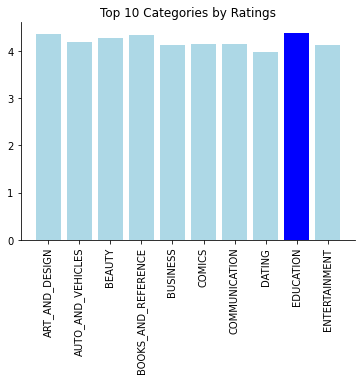

In [185]:
%matplotlib inline
colors=["lightblue" if (x<max(Catratings["Rating"])) else "blue" for x in Catratings["Rating"]]
plt.bar(height=Catratings["Rating"],x=Catratings.index,color=colors)
plt.xticks(rotation='vertical')
plt.title("Top 10 Categories by Ratings")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)


In [186]:
pivoted=gstore.pivot_table(values="Rating",index="Category",columns="Content Rating",aggfunc='mean').drop(["Adults only 18+","Unrated"],axis=1)

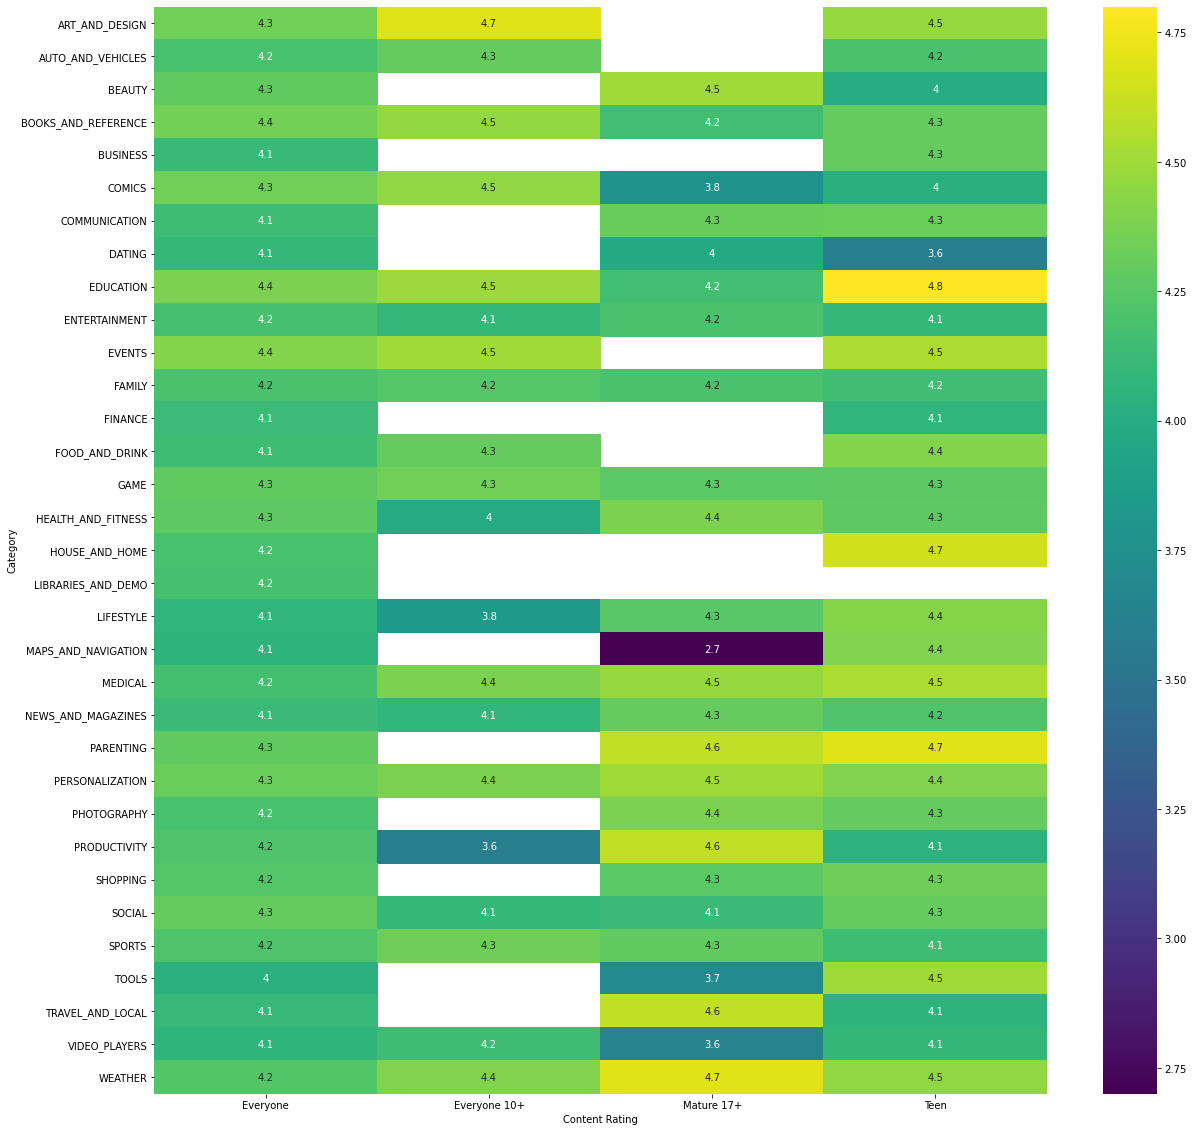

In [74]:
plt.figure(figsize=(20,20))
sns.heatmap(pivoted,cmap="viridis",annot=True)

# Content Ratings

In [193]:
gstore["Content Rating"].value_counts()

Everyone           8714
Teen               1208
Mature 17+          499
Everyone 10+        414
Adults only 18+       3
Unrated               2
Name: Content Rating, dtype: int64

In [208]:
##Lets try to see the top categoories or each 
pivoted2=gstore.pivot_table(columns="Content Rating",index="Category",values="App",aggfunc="count").drop(["Adults only 18+","Unrated"],axis=1)

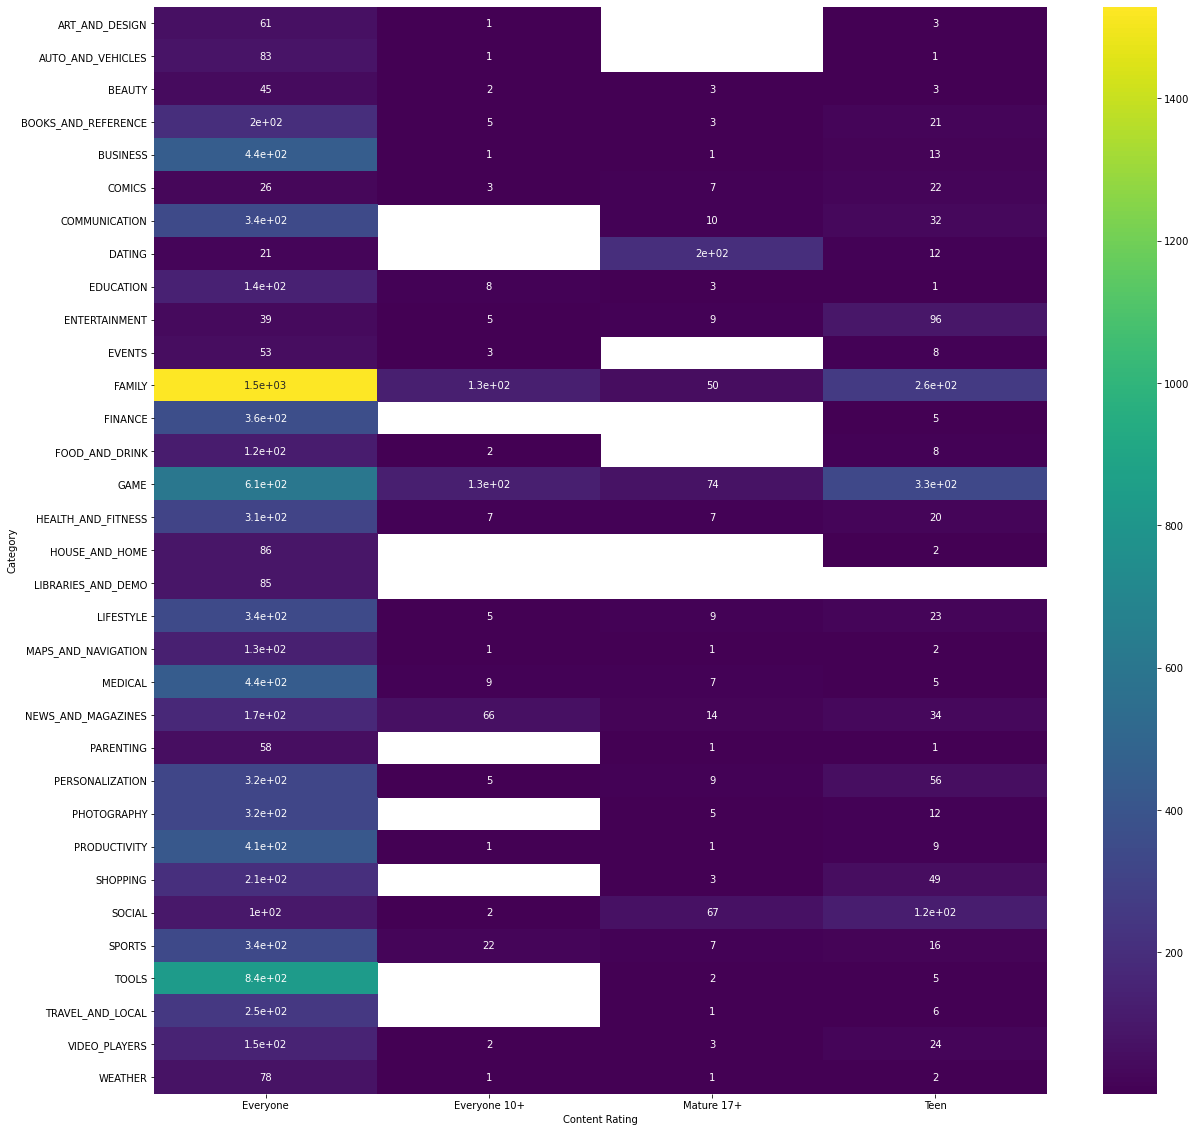

In [212]:
plt.figure(figsize=(20,20))
sns.heatmap(pivoted2,annot=True,cmap="viridis")

# In the teen category ,Gaming & Social apps are very popular while in the Mature 17+ category dating apps are very popular

# Lets try to calculate app revenue for apps that are not free


In [218]:
paidapps=gstore2[gstore2["Price"]!="0"]
paidapps["Price"]=paidapps["Price"].str[1:]
paidapps["Price"]=pd.to_numeric(paidapps["Price"],errors="coerce")

<ipython-input-218-abc220a4f842>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  paidapps["Price"]=paidapps["Price"].str[1:]
<ipython-input-218-abc220a4f842>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  paidapps["Price"]=pd.to_numeric(paidapps["Price"],errors="coerce")


In [223]:
paidapps["Revenue"]=paidapps["Price"]*paidapps["Installs"]

<ipython-input-223-6f353ac6fd08>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  paidapps["Revenue"]=paidapps["Price"]*paidapps["Installs"]


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Revenue
234,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442,6.8M,10000.0,Paid,4.99,Everyone,Business,"March 25, 2018",1.5.2,4.0 and up,49900.0
235,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295,39M,10000.0,Paid,4.99,Everyone,Business,"April 11, 2017",3.4.6,3.0 and up,49900.0
290,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442,6.8M,10000.0,Paid,4.99,Everyone,Business,"March 25, 2018",1.5.2,4.0 and up,49900.0
291,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295,39M,10000.0,Paid,4.99,Everyone,Business,"April 11, 2017",3.4.6,3.0 and up,49900.0
427,Puffin Browser Pro,COMMUNICATION,4.0,18247,Varies with device,10000.0,Paid,3.99,Everyone,Communication,"July 5, 2018",7.5.3.20547,4.1 and up,39900.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10735,FP VoiceBot,FAMILY,NaN,17,157k,10.0,Paid,0.99,Mature 17+,Entertainment,"November 25, 2015",1.2,2.1 and up,9.9
10760,Fast Tract Diet,HEALTH_AND_FITNESS,4.4,35,2.4M,100.0,Paid,7.99,Everyone,Health & Fitness,"August 8, 2018",1.9.3,4.2 and up,799.0
10782,Trine 2: Complete Story,GAME,3.8,252,11M,1000.0,Paid,16.99,Teen,Action,"February 27, 2015",2.22,5.0 and up,16990.0
10785,"sugar, sugar",FAMILY,4.2,1405,9.5M,1000.0,Paid,1.20,Everyone,Puzzle,"June 5, 2018",2.7,2.3 and up,1200.0


# Lets compare whether paid apps are rated higher than free apps

In [228]:
freeapps=gstore2[gstore2["Type"]=="Free"]
rat_dif=np.mean(paidapps["Rating"])-np.mean(freeapps["Rating"])
rat_dif

0.10314930568828817

# Thank You .Hope you liked it 